<a href="https://www.kaggle.com/code/mohammedmmfaidey/top5-creators-classification?scriptVersionId=109686143" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        #print(os.path.join(dirname, filename))
        pass
    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# to prevent cleanup message from tensorflow as there are alot of them appear
import tensorflow as tf

tf.get_logger().setLevel('INFO')

In [4]:
INPUT_DATA_PATH = "/kaggle/input/nft-art-dataset/"

# Loading The DataSet

In [5]:
data  = pd.read_csv(INPUT_DATA_PATH + "dataset/dataset.csv")

In [6]:
data.head()

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
0,30 min Drawings,Giant Frog,kristyglas,kristyglas_30-min-drawings_giant-frog,50.0,SWAP.HIVE,PHOTO,2,False,30,2020,1,0,QmegjZDN2gyD9A6cG4efj8DwbLLGTW6isDGadNC2yVJHfH,./dataset/image/QmegjZDN2gyD9A6cG4efj8DwbLLGTW...
1,Experimental Video,Biospecimens,juliakponsford,juliakponsford_experimental-video_biospecimens,500.0,SWAP.HIVE,VIDEO,0,False,1,2020,1,0,QmeN4KuTQwHPWvGDhiopNJziqmf1feGeabDD4Gk7z9DgUL,./dataset/video/QmeN4KuTQwHPWvGDhiopNJziqmf1fe...
2,Sexy Art,long legs,badsexy,badsexy_sexy-art_long-legs,10.0,SWAP.HIVE,PHOTO,0,True,2,2021,1,0,QmaifAjZTJd8jTxNrwSoGWmFpbPYcszMF4ZcZDBwpRR4v4,./dataset/image/QmaifAjZTJd8jTxNrwSoGWmFpbPYcs...
3,Dream World,A Guide in my Dreams,yoslehz,yoslehz_dream-world_a-guide-in-my-dreams,20.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,QmUTicJApSyByFb7sgsNa6cz8MG5RKsHvGLP61gxSF3JsN,./dataset/image/QmUTicJApSyByFb7sgsNa6cz8MG5RK...
4,Dream World,Silent Observer,yoslehz,yoslehz_dream-world_silent-observer,20.0,SWAP.HIVE,GIF,0,False,2,2020,1,0,Qmb8WbXXdorG52sgY4mSyYUjevE65SGa2vhSxdXstfinz1,./dataset/gif/Qmb8WbXXdorG52sgY4mSyYUjevE65SGa...


In [7]:
data['creator'].unique()

array(['kristyglas', 'juliakponsford', 'badsexy', 'yoslehz', 'solymi',
       'elias15g', 'theia7', 'aleister', 'drew0', 'medinesaan',
       'berlissanoja', 'difelice5000', 'lizano', 'orianabeam',
       'xxxthorxxx', 'alfonsoj', 'trayan', 'tygertyger', 'leslieebano',
       'katerinaramm', 'elenasteem', 'thoughts-in-time', 'daragfx',
       'julesquirin', 'jrej', 'lacking', 'noahfromearth', 'ake-rg',
       'prokopevone', 'drhoofman', 'ooakosimo', 'juanmiguelsalas',
       'alezambo', 'yakubenko', 'masakaano', 'richjf', 'oshu.chan',
       'tntdabomb', 'brunonacif', 'xyanthon', 'wizardx', 'medussart',
       'purp127', 'anftimatter', 'nattorare', 'nini1', 'alijones',
       'paolazun', 'nikkinicole', 'shantyshawn', 'pollyfoxxy', 'oblinof',
       'desireeart', 'jrob47', 'meninainabox', 'casilokodesing',
       'starmasayume', 'silver.art', 'rodrigocairo', 'heartatthack',
       'enrique89', 'jonamccallum', 'jazdaartist', 'isaria',
       'opheliaviolet', 'ancientfroggy', 'astrohive',

### Show the top 5 creators

In [8]:
top_creators = data['creator'].value_counts().head(5)

### make a dictionary of top5 creators 

In [9]:
top_creators_stats = dict()
for i in range(len(top_creators)):
    top_creators_stats[top_creators.index[i]] = top_creators.values[i]
top_creators_stats

{'elenasteem': 170,
 'richardfyates': 119,
 'artxmike': 99,
 'doze': 93,
 'elgeko': 88}

### make a list of top file creators

In [10]:
top_creators_list = []
for a, b in enumerate(top_creators_stats.keys()):
    top_creators_list.append(b)
    
print(top_creators_list)
print(len(top_creators_list))

['elenasteem', 'richardfyates', 'artxmike', 'doze', 'elgeko']
5


In [11]:
data2= data.copy()

# select top 5 creators and make a copied dataframe for them


In [12]:
data2 = data2[data2['creator'].apply(lambda x : x in top_creators_list)]


In [13]:
print(data2['creator'].unique())
print(len(data2['creator'].unique()))

['elenasteem' 'artxmike' 'richardfyates' 'elgeko' 'doze']
5


### so this is info of top artists

In [14]:
data2

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
37,white owl,white owl,elenasteem,elenasteem_white-owl_white-owl,50.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,QmZ87ZfVxBB3D1myFKzQxrHv9sJf3bKbuZf2M1TWJwjDeL,./dataset/image/QmZ87ZfVxBB3D1myFKzQxrHv9sJf3b...
157,Markusha SAI,Markusha SAI,elenasteem,elenasteem_markusha-sai_markusha-sai,50.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,QmeNXdFtSSMfNekMZqtaDTRSy9fE2FPecENFpr9KWC2C5J,./dataset/image/QmeNXdFtSSMfNekMZqtaDTRSy9fE2F...
193,DeviantArt Fennec Fox Sketch,DeviantArt Fennec Fox Sketch,elenasteem,elenasteem_deviantart-fennec-fox-sketch_devian...,30.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,Qmekz3t3JUSPKZ3myAHDGJXm9JZ8p6cGD54wCDBV78BD6T,./dataset/image/Qmekz3t3JUSPKZ3myAHDGJXm9JZ8p6...
247,4 series,4 (2),artxmike,artxmike_4-series_4-2,10.0,SWAP.HIVE,PHOTO,0,False,4,2021,1,0,Qmbhg4Vxzk4MwbYq3oNeTzevhtqWRjkTQf98HdmG4CG6f2,./dataset/image/Qmbhg4Vxzk4MwbYq3oNeTzevhtqWRj...
264,Trash for Life (In the Haunted Honeycomb),"Virtually Worthless(*) NFT by RFY""",richardfyates,richardfyates_trash-for-life-in-the-haunted-ho...,5.0,SWAP.HIVE,PHOTO,5,False,53,2020,1,0,QmTqXu6RWYTkKGrvKveVNMhamanRCPNGQDCsQ6wPrgcKfP,./dataset/image/QmTqXu6RWYTkKGrvKveVNMhamanRCP...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,doze,Infinite Psycho Rotation,doze,doze_doze_infinite-psycho-rotation,100.0,SWAP.HIVE,VIDEO,0,False,2,2020,1,0,QmX9ou9aY4Ex6AReLqiZUb1QvzuAsNgWhmwSekpov4m9uW,./dataset/video/QmX9ou9aY4Ex6AReLqiZUb1QvzuAsN...
4162,Trash for Life (In the Haunted Honeycomb),"Only The Lonely... (So EXPENSIVE!) by RFY""",richardfyates,richardfyates_trash-for-life-in-the-haunted-ho...,1013.0,SWAP.HIVE,PHOTO,0,False,1,2020,1,0,QmWB76TLLkmV2WJLHTs7P7zwzydmhU5UdutbqaUNUB6gYV,./dataset/image/QmWB76TLLkmV2WJLHTs7P7zwzydmhU...
4185,GIF art,crypto thinkers,elgeko,elgeko_gif-art_crypto-thinkers,99.0,SWAP.HIVE,GIF,0,False,5,2020,1,0,QmQZDfsTyqH7uQe75NqeVmtzvNW9eN45hXpexekixeWM4F,./dataset/gif/QmQZDfsTyqH7uQe75NqeVmtzvNW9eN45...
4187,HIVE ART,online art - Cryptoverse,elgeko,elgeko_hive-art_online-art-cryptoverse,99.0,SWAP.HIVE,GIF,0,False,7,2020,1,0,QmSAFuLYMpkszCY45ednQpzjSYCpkpZzurygvWHCTP1yo9,./dataset/gif/QmSAFuLYMpkszCY45ednQpzjSYCpkpZz...


## Working on photo data not videos or gifs

In [15]:
PHOTO_DATA = data2[data2['type' ]== 'PHOTO']

In [16]:
PHOTO_DATA['type'].unique()

array(['PHOTO'], dtype=object)

In [17]:
PHOTO_DATA

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
37,white owl,white owl,elenasteem,elenasteem_white-owl_white-owl,50.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,QmZ87ZfVxBB3D1myFKzQxrHv9sJf3bKbuZf2M1TWJwjDeL,./dataset/image/QmZ87ZfVxBB3D1myFKzQxrHv9sJf3b...
157,Markusha SAI,Markusha SAI,elenasteem,elenasteem_markusha-sai_markusha-sai,50.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,QmeNXdFtSSMfNekMZqtaDTRSy9fE2FPecENFpr9KWC2C5J,./dataset/image/QmeNXdFtSSMfNekMZqtaDTRSy9fE2F...
193,DeviantArt Fennec Fox Sketch,DeviantArt Fennec Fox Sketch,elenasteem,elenasteem_deviantart-fennec-fox-sketch_devian...,30.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,Qmekz3t3JUSPKZ3myAHDGJXm9JZ8p6cGD54wCDBV78BD6T,./dataset/image/Qmekz3t3JUSPKZ3myAHDGJXm9JZ8p6...
247,4 series,4 (2),artxmike,artxmike_4-series_4-2,10.0,SWAP.HIVE,PHOTO,0,False,4,2021,1,0,Qmbhg4Vxzk4MwbYq3oNeTzevhtqWRjkTQf98HdmG4CG6f2,./dataset/image/Qmbhg4Vxzk4MwbYq3oNeTzevhtqWRj...
264,Trash for Life (In the Haunted Honeycomb),"Virtually Worthless(*) NFT by RFY""",richardfyates,richardfyates_trash-for-life-in-the-haunted-ho...,5.0,SWAP.HIVE,PHOTO,5,False,53,2020,1,0,QmTqXu6RWYTkKGrvKveVNMhamanRCPNGQDCsQ6wPrgcKfP,./dataset/image/QmTqXu6RWYTkKGrvKveVNMhamanRCP...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,Psychedelic Rockpool,Psychedelic Rockpool,artxmike,artxmike_psychedelic-rockpool_psychedelic-rock...,25.0,SWAP.HIVE,PHOTO,2,False,5,2019,1,0,QmUEY6gNjQ3ufuVXW5kUR83DQW9y1EQ3a1UMfkgZ2cNNff,./dataset/image/QmUEY6gNjQ3ufuVXW5kUR83DQW9y1E...
4119,The Vixen,The Vixen,artxmike,artxmike_the-vixen_the-vixen,10.0,SWAP.HIVE,PHOTO,0,False,5,2020,1,0,QmQYVhQq4w5xRLLL6p8YbQDsxw3bnpz45hUUXYhRBjP3H4,./dataset/image/QmQYVhQq4w5xRLLL6p8YbQDsxw3bnp...
4145,Transmogrification,Transmogrification1,artxmike,artxmike_transmogrification_transmogrification1,40.0,SWAP.HIVE,PHOTO,0,True,5,2019,1,0,QmQ9BRvwJyysQDuEqsGNEfcA7na93vYQakzXNimjpSmv29,./dataset/image/QmQ9BRvwJyysQDuEqsGNEfcA7na93v...
4162,Trash for Life (In the Haunted Honeycomb),"Only The Lonely... (So EXPENSIVE!) by RFY""",richardfyates,richardfyates_trash-for-life-in-the-haunted-ho...,1013.0,SWAP.HIVE,PHOTO,0,False,1,2020,1,0,QmWB76TLLkmV2WJLHTs7P7zwzydmhU5UdutbqaUNUB6gYV,./dataset/image/QmWB76TLLkmV2WJLHTs7P7zwzydmhU...


## clean the path feature by removing the first two chars -> ./ 
## as we will use the path laterly without the need for to chars -> ./


In [18]:
PHOTO_DATA['path'] = PHOTO_DATA['path'].apply(lambda x : x.replace('./', ''))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
PHOTO_DATA


,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
37,white owl,white owl,elenasteem,elenasteem_white-owl_white-owl,50.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,QmZ87ZfVxBB3D1myFKzQxrHv9sJf3bKbuZf2M1TWJwjDeL,dataset/image/QmZ87ZfVxBB3D1myFKzQxrHv9sJf3bKb...
157,Markusha SAI,Markusha SAI,elenasteem,elenasteem_markusha-sai_markusha-sai,50.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,QmeNXdFtSSMfNekMZqtaDTRSy9fE2FPecENFpr9KWC2C5J,dataset/image/QmeNXdFtSSMfNekMZqtaDTRSy9fE2FPe...
193,DeviantArt Fennec Fox Sketch,DeviantArt Fennec Fox Sketch,elenasteem,elenasteem_deviantart-fennec-fox-sketch_devian...,30.0,SWAP.HIVE,PHOTO,1,False,2,2020,1,0,Qmekz3t3JUSPKZ3myAHDGJXm9JZ8p6cGD54wCDBV78BD6T,dataset/image/Qmekz3t3JUSPKZ3myAHDGJXm9JZ8p6cG...
247,4 series,4 (2),artxmike,artxmike_4-series_4-2,10.0,SWAP.HIVE,PHOTO,0,False,4,2021,1,0,Qmbhg4Vxzk4MwbYq3oNeTzevhtqWRjkTQf98HdmG4CG6f2,dataset/image/Qmbhg4Vxzk4MwbYq3oNeTzevhtqWRjkT...
264,Trash for Life (In the Haunted Honeycomb),"Virtually Worthless(*) NFT by RFY""",richardfyates,richardfyates_trash-for-life-in-the-haunted-ho...,5.0,SWAP.HIVE,PHOTO,5,False,53,2020,1,0,QmTqXu6RWYTkKGrvKveVNMhamanRCPNGQDCsQ6wPrgcKfP,dataset/image/QmTqXu6RWYTkKGrvKveVNMhamanRCPNG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,Psychedelic Rockpool,Psychedelic Rockpool,artxmike,artxmike_psychedelic-rockpool_psychedelic-rock...,25.0,SWAP.HIVE,PHOTO,2,False,5,2019,1,0,QmUEY6gNjQ3ufuVXW5kUR83DQW9y1EQ3a1UMfkgZ2cNNff,dataset/image/QmUEY6gNjQ3ufuVXW5kUR83DQW9y1EQ3...
4119,The Vixen,The Vixen,artxmike,artxmike_the-vixen_the-vixen,10.0,SWAP.HIVE,PHOTO,0,False,5,2020,1,0,QmQYVhQq4w5xRLLL6p8YbQDsxw3bnpz45hUUXYhRBjP3H4,dataset/image/QmQYVhQq4w5xRLLL6p8YbQDsxw3bnpz4...
4145,Transmogrification,Transmogrification1,artxmike,artxmike_transmogrification_transmogrification1,40.0,SWAP.HIVE,PHOTO,0,True,5,2019,1,0,QmQ9BRvwJyysQDuEqsGNEfcA7na93vYQakzXNimjpSmv29,dataset/image/QmQ9BRvwJyysQDuEqsGNEfcA7na93vYQ...
4162,Trash for Life (In the Haunted Honeycomb),"Only The Lonely... (So EXPENSIVE!) by RFY""",richardfyates,richardfyates_trash-for-life-in-the-haunted-ho...,1013.0,SWAP.HIVE,PHOTO,0,False,1,2020,1,0,QmWB76TLLkmV2WJLHTs7P7zwzydmhU5UdutbqaUNUB6gYV,dataset/image/QmWB76TLLkmV2WJLHTs7P7zwzydmhU5U...


In [20]:
#%cd /kaggle/working 
#%mkdir dataset
#%mkdir top5creator_images

In [21]:
%pwd

'/kaggle/working'

In [22]:
%cd top5creator_images/

[Errno 2] No such file or directory: 'top5creator_images/'
/kaggle/working


In [23]:
DDPATH = '/kaggle/working/'

In [24]:
len(os.listdir(INPUT_DATA_PATH + 'dataset/image'))

3021

In [25]:
#%rm -r top5creators/

## Create Two Directories 

## The First Directory is top5creators
> in this directory I Will make new SubDirectories based on names of top5 creators

> then i will copy the images of each creator from the dataset/images 

> to each creator direactory that these images belong to him

> e.g. 

###  top5creators/
                          
                1. elenasteem/ 
                2. richardfyates/ 
                3. artxmike/
                4. doze/
                5. elgeko/

## The Second Directory is top5creators_images 

> In this directory i will make 3 sub directories train , val , test 

> In each one of these directories I made a 5 sub directories , mean , a new sub directorey form each creator

> so in the top5creators_images/train we will find there are 5 directories based on the top 5 creators

> e.g.

### 1. top5creators_images/
    
          1.1 train/
          
                1.1.1 elenasteem/ 
                1.1.2 richardfyates/ 
                1.1.3 artxmike/
                1.1.4 doze/
                1.1.5 elgeko/
      
          1.2 val/
          
                  same in train sub dirs
                  
          1.3 test/
          
                  same in val sub dirs

In [26]:

os.makedirs('top5creators')
os.makedirs("top5creators_images")

In [27]:
%ls

__notebook_source__.ipynb  top5creators/  top5creators_images/


In [28]:
top5_creators_dir ='top5creators/'

### create the sub dirs for each creator

In [29]:
for creator in top_creators_list:
    os.makedirs(top5_creators_dir + creator)

In [30]:
%ls top5creators/

artxmike/  doze/  elenasteem/  elgeko/  richardfyates/


In [31]:
PHOTO_DATA[PHOTO_DATA['creator' ]== top_creators_list[0]]['path']

37      dataset/image/QmZ87ZfVxBB3D1myFKzQxrHv9sJf3bKb...
157     dataset/image/QmeNXdFtSSMfNekMZqtaDTRSy9fE2FPe...
193     dataset/image/Qmekz3t3JUSPKZ3myAHDGJXm9JZ8p6cG...
305     dataset/image/QmRX4UnqjRJQjJGymBaRWmm8WLLiphZm...
327     dataset/image/QmTDrPBbC11MT7PVLWBjcodGV37XDiTm...
                              ...                        
3275    dataset/image/QmQ67aJKAWxjpovb2GxzmwTMVTj7ardu...
3276    dataset/image/QmXBw6g21THEqiUaBTzYyASV3UqmH7AM...
3290    dataset/image/QmR3VzmNNzjM8qsENN7ZRHfUss5AntWs...
3291    dataset/image/QmP6cUCko9cYsTU1CTBaQ1a5PFSwqzvL...
3354    dataset/image/QmaH3R5BmiWbtnqNXbAr2ibiB7QRSNUX...
Name: path, Length: 157, dtype: object

In [32]:
INPUT_DATA_PATH

'/kaggle/input/nft-art-dataset/'

In [33]:
%ls

__notebook_source__.ipynb  top5creators/  top5creators_images/


### copy images form dataset/images of top 5 creators
### to thier new location in top5creators


In [34]:
# copy images of these creators to another images folder called top5_images
from tqdm import tqdm
import shutil
import random

i = 0
for creator in top_creators_list:
    
    for path in tqdm(PHOTO_DATA[PHOTO_DATA['creator' ]== creator]['path']):
        i+= 1
    
        #print(path)

        shutil.copy(INPUT_DATA_PATH + path , top5_creators_dir + creator ) 
    #print(i)


100%|██████████| 20/20 [00:01<00:00, 13.07it/s]


In [35]:
# test if we succuesfully make a folder for top5 creators 
#and copy their images from images in the data set to the new directory for each one of them

%ls top5creators/doze

QmNWsq9egm5jdrAoVjduEHCyj9U8n6cYhsGFmMH8LpAT7Y.jpg
QmNzEuLPgokNFesic6UzSBRhZZQ9BfF12c8AWr2zNMGVbn.jpeg
QmPCCRd66iFPqHw4EXNojKSVnXkWYyRMgmR76xaxfkSm52.jpg
QmPQzneDAuodZ37TFSNcP4rNc1onP6j3Y5SWGhkNfi9Bxq.jpeg
QmRChvPDUp9QJq9qepvPbAbNhU7Xn4HDxwuFV477jnM9q3.jpg
QmRZetSxBym19zjtEADXwmcRRgPUwRMfbXbhTKyagegRpQ.png
QmRfNKjbf4C9wWXEXww9hUDGrpDiKNhygvnsQNtXpEEXXx.jpeg
QmRr5azUCkfUWb4V1BsbVYmkHtY4TGJYCydiqurPoo1TeN.jpg
QmRwHe5B8d7vRz1Cg9EGxcnxezjY4WshkjkuSuCB1FusvM.png
QmS8TVZZjtZkYXUV6eXYqabJe61BaPcY3o9wmzq8Gy7pEW.jpeg
QmSN4i9PC9657so5EaaJhW1fZKLNxHiNWkZyzqKt4kJvdu.jpg
QmT4uA9WY5NqkuDdXtWigNgjUzLxZNudKUd5ktWWw7tFCk.png
QmTWBaccs2P8PQA81HN3hxDMLULXKS7nBgsC3ojabhXUU3.jpeg
QmTcdkuDW4FnaunyfXewsWxLQcYBAyvJMswtC47RKfxR63.png
QmTd2EWs24mugFxueABGo8WFQr2iCNnU1fnM8EbsJe2Bqh.jpeg
QmTiUgHnVhhE867MVP9MBd9q1jeF7eTkNyP3t3ekuNJH5p.jpeg
QmUCwcZfx6pAaFRhSBGXCE7twsrff6kJmAPtNowMWmPX2S.png
QmUSSNw558L7HCPEAui4PnxF565uFkBBCKjRcQEF2K2UL9.png
QmVFwt6JyDC5WWXqHFwPZmXp8jvjrxjvGq1b5naE8AhZhL.jpeg
QmVbDaZoekUKHHX2Hsg6NwW

### copy images form dataset/images of top 5 creators
### to thier new location in top5creators_images
### and split them automatically to train val test split
### and each directory of train, val, test,
### has inside subdirs for each creator
### then the images

In [36]:
os.makedirs('top5creators_images/train')
os.makedirs('top5creators_images/test')
os.makedirs('top5creators_images/val')


In [37]:
%ls top5creators/elenasteem/

QmNXKQJZu83dVWWJ3AFSorUrtDFFxxzJLsxr9nL1id29YZ.jpeg
QmNhbZ8xzWZ5taeoRfZZc5B4jiXKCeTiNHUH9rMZzkUfTB.jpg
QmNi772EfJh47edE8soD77wLMYWjH16AkJ3Esi8gEpKkqj.jpg
QmNiBDdbPaJNHNbq53xnACeXmC5QqcvgmduhXK3YQYPhQR.jpg
QmNiihDBMMFPtaXtXWoUr5ZoumaabYM9RgdrzZ5tV4Focy.jpeg
QmNspgzZ86Lyw8WZts7xZTdfqxH9CuddgWktBGh7GS4s9c.jpg
QmP3i7onYBTjz6FQAAeoqjNXo3vr5oKxrEahTeV3t282Dy.jpg
QmP6cUCko9cYsTU1CTBaQ1a5PFSwqzvLPwyY4GnG7SybGU.jpg
QmPGURTx3xr1eL13PbDUmbp5sQf5giszLzR3itC9SAMEEy.jpg
QmPNA9pA9SLguDmCSFsZte8zcU5R6QDYK9bT3fcq56AWfD.jpeg
QmPQh9FPjA8etLbes2EgQa4NjV3gRYziEqQVpTfTUhgx9C.jpg
QmPggdJPChRb1nMJqZkbTaLU6tG1oGFPBM89VLomSiDiZP.jpg
QmPmRP6KnPs3rDCBpxmA2uu54buYXV6mzTXwkJcajAmccQ.jpeg
QmPqQabDfzr6eFiJrkvkgxX46hEfhx23ygVXhuVD9zkX7g.jpg
QmPrjmxwKY3mU7JLGFkAjBpegU2UYM7aoxLFVoYcdts8PT.jpeg
QmPwEJ3BVYjmzJ7hrodUpHV5adSMNrcL3JMGABLRDKJeW8.jpg
QmPxyi4YqmXXxvocrWLyCga1HLfYsfHPVpzUaaNnwgdVCQ.jpg
QmPzAVsSHP6qUAHW3rg7pCgp6988PGTeWDB7SYKykq7ose.jpg
QmQ67aJKAWxjpovb2GxzmwTMVTj7ardudiaTwUZ54rMjGV.jpg
QmQS2psmQnrZWmSzceUktArMqz

In [38]:
import os
import numpy as np
import shutil
import random

root_dir = '/kaggle/working/' # data root path
classes_dir = top_creators_list #total labels

val_ratio = 0.15
test_ratio = 0.05

for cls in classes_dir:
    
    
    if not os.path.isdir(root_dir + 'top5creators_images/train/' + cls):
        os.makedirs(root_dir + 'top5creators_images/train/' + cls)
        #print("root_dir + 'top5creators_images/train/' + cls -> " ,root_dir + 'top5creators_images/train/' + cls,"\n" )
        
    if not os.path.isdir(root_dir + 'top5creators_images/val/' + cls):
        os.makedirs(root_dir +'top5creators_images/val/' + cls)
        #print("root_dir + 'top5creators_images/val/' + cls -> " ,root_dir + 'top5creators_images/val/' + cls,"\n" )
        
    if not os.path.isdir(root_dir + 'top5creators_images/test/' + cls):
        os.makedirs(root_dir +'top5creators_images/test/' + cls)
        #print("root_dir + 'top5creators_images/test/' + cls -> " ,root_dir + 'top5creators_images/test/' + cls ,"\n" )


    # Creating partitions of the data after shuffeling
    src = root_dir + 'top5creators/' + cls # Folder to copy images from
    #print("src -> " , src, "\n")

    allFileNames = os.listdir(src)
    #print("allFileNames -> " , allFileNames ,"\n")

    np.random.shuffle(allFileNames)

    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                               int(len(allFileNames)* (1 - test_ratio))])

    #print("train_FileNames -> " , train_FileNames ,"\n")
    #print("val_FileNames -> " , val_FileNames ,"\n")
    #print("test_FileNames -> " , test_FileNames ,"\n")
    #print("==================================== \n")


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    #print("train_FileNames -> " , train_FileNames ,"\n")

    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    #print("val_FileNames -> " , val_FileNames ,"\n")

    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
    #print("test_FileNames -> " , test_FileNames ,"\n")


    #print('Total images: ', len(allFileNames))
    #print('Training: ', len(train_FileNames))
    #print('Validation: ', len(val_FileNames))
    #print('Testing: ', len(test_FileNames))


    #print("*******************************************")
    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir + 'top5creators_images/' +'train/' + cls)
        #print("name -> ", name, "\n")
        #print(" root_dir + 'top5creators_images/' +'train/' + cls -> ",  root_dir + 'top5creators_images/' +'train/' + cls ,"\n")

    #print("-----------------------------------------")
    for name in val_FileNames:
        shutil.copy(name, root_dir+ 'top5creators_images/' +'val/' + cls)
        #print("name -> ", name, "\n")
        #print(" root_dir + 'top5creators_images/' +'val/' + cls -> ",  root_dir + 'top5creators_images/' +'val/' + cls ,"\n")

    #print("-----------------------------------------") 
    for name in test_FileNames:
        shutil.copy(name, root_dir+ 'top5creators_images/' +'test/' + cls)
        #print("name -> ", name, "\n")
        #print(" root_dir + 'top5creators_images/' +'test/' + cls -> ",  root_dir + 'top5creators_images/' +'test/' + cls ,"\n")

> make a test to make sure that the copied images is belong to the same creator

> in the dataset.csv and our copy is sucssesfuly

> so just take the cid of the below image with out taking the extintion eg. .png , .jpg or .jpeg 

> just the cid

In [39]:
PHOTO_DATA[PHOTO_DATA['cid'] == 'QmRr5azUCkfUWb4V1BsbVYmkHtY4TGJYCydiqurPoo1TeN']

,title,name,creator,art_series,price,symbol,type,likes,nsfw,tokens,year,rights,royalty,cid,path
2802,Printable NFT,"Welcome to City, Muahah!!!",doze,doze_printable-nft_welcome-to-city-muahah,120.0,SWAP.HIVE,PHOTO,0,False,2,2020,1,0,QmRr5azUCkfUWb4V1BsbVYmkHtY4TGJYCydiqurPoo1TeN,dataset/image/QmRr5azUCkfUWb4V1BsbVYmkHtY4TGJY...


> so after looking to creator name we find our copy is succesfuly done

# Loading Data

In [40]:
# make some configuration for batch_size , image_height, image_width 
# we make a low batch_size to save our memory from crashing

batch_size = 32
img_height = 180
img_width = 180

## Loading train images 

In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/working/top5creators_images/train',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 310 files belonging to 5 classes.


2022-10-24 02:19:43.306950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 02:19:43.423405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 02:19:43.424306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 02:19:43.427742: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

> as we can see we succsfuly loading 310 images from the trian directory 

> that they belong to the top 5 creators , we treat them as classes for our images dataset

In [42]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

> we can see our classes names based on the creators name 

In [43]:
class_names = train_ds.class_names
print(class_names)

['artxmike', 'doze', 'elenasteem', 'elgeko', 'richardfyates']


## Loading valedation dataset 

In [44]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/working/top5creators_images/val',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds

Found 60 files belonging to 5 classes.


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

## Loading test dataset

In [45]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/working/top5creators_images/test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds

Found 21 files belonging to 5 classes.


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

## display some examples of train images
#### there is a red message appear when we run the following code
#### but it is not a error or warning message ,
#### i think it is just an ordinary message form tensorflow

In [46]:
tf.__version__




'2.6.4'

#### i think the clean up message is showen as there is a new version from tensorflow is 
#### more more updated from the current version of tensorflow on kaggle kernel 

2022-10-24 02:19:46.567698: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:19:56.566353: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 113 of 256
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:19:59.843175: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 231909240 exceeds 10% of free system memory.
Cleanup called...
Cleanup called.

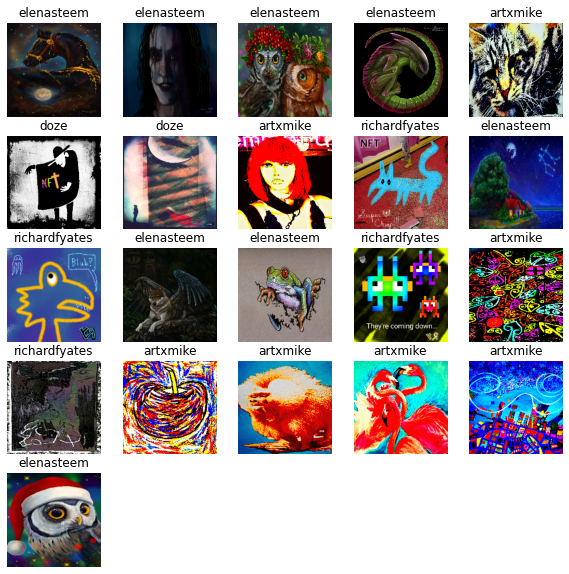

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(21):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## display some test images

Cleanup called...
Cleanup called...
Cleanup called...


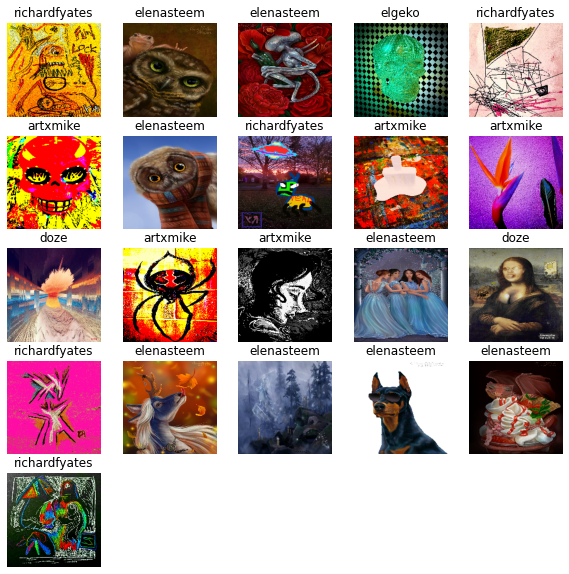

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(21):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## display val images 

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


<class 'tensorflow.python.framework.ops.EagerTensor'>


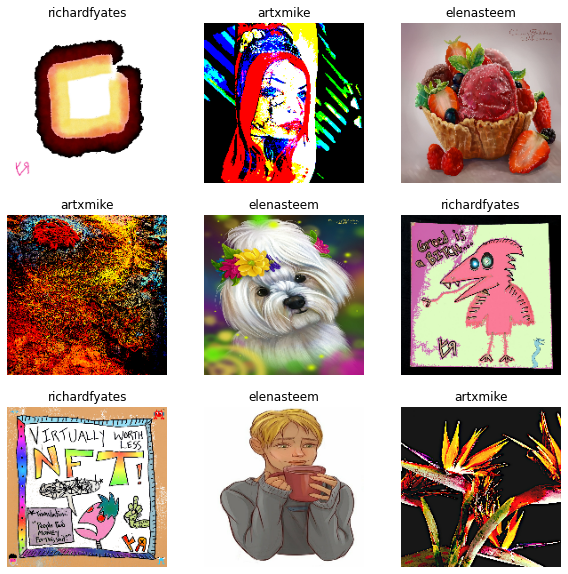

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    print(type(images))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [50]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:20:36.827886: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 118 of 256
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:20:39.411831: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 231909240 exceeds 10% of free system memory.
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup c

(32, 180, 180, 3)
(32,)


# Standardize the data

> The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.

> Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling:

In [51]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


# Configure the dataset for performance 

In [52]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Create the model

In [53]:
# import dependecieces to build our model 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [54]:
num_classes = len(class_names)

model_1 = Sequential([
    layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same' , activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
    
])

# Compile The model_1 

> I used Adam optimizer 

> Sparse Categorical Cross Entropy as loss function 

> 

In [55]:
model_1.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

# model_1 Summary

In [56]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

# Train the model

In [57]:
epochs = 10 
history = model_1.fit(train_ds,
                   validation_data = val_ds,
                   epochs = epochs)


Epoch 1/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:21:18.289853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 113 of 256
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:21:21.492777: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 231909240 exceeds 10% of free system memory.
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup c

10/10 [==============================] - ETA: 0s - loss: 1.7714 - accuracy: 0.1935

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 45s 764ms/step - loss: 1.7714 - accuracy: 0.1935 - val_loss: 1.4340 - val_accuracy: 0.2500
Epoch 2/10
10/10 [==============================] - 0s 16ms/step - loss: 1.3555 - accuracy: 0.4903 - val_loss: 1.3672 - val_accuracy: 0.3000
Epoch 3/10
10/10 [==============================] - 0s 14ms/step - loss: 1.1702 - accuracy: 0.5613 - val_loss: 1.1307 - val_accuracy: 0.6167
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: 0.9861 - accuracy: 0.6355 - val_loss: 1.0162 - val_accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 0s 14ms/step - loss: 0.7746 - accuracy: 0.7065 - val_loss: 0.9526 - val_accuracy: 0.7167
Epoch 6/10
10/10 [==============================] - 0s 14ms/step - loss: 0.5654 - accuracy: 0.8161 - val_loss: 1.0129 - val_accuracy: 0.7167
Epoch 7/10
10/10 [==============================] - 0s 14ms/step - loss: 0.4375 - accuracy: 0.8581 - val_loss: 1.0504 - val_accuracy: 0.6833
Epoch 8/10
10/10 [====

# Visualize Trianing Results 

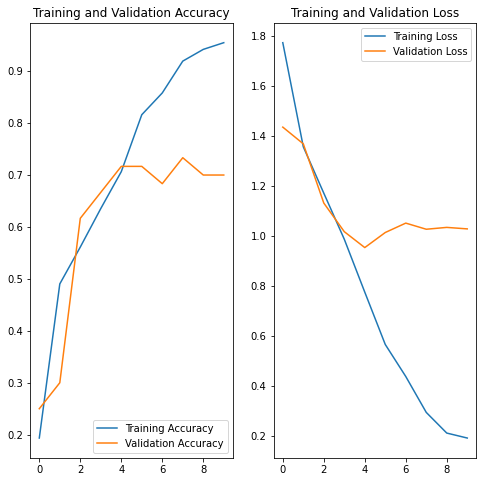

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

We can see in the above plots taht training accuracy is increasing like linearly over time,

but validation accuracy stalls around 65% (note : it varies from time to time when i restart the seesion on kaggle )in the training process , 

also the difference in accuracy between training and validation accuracy is noticable 

so this is a sign of overfitting 

and When there are a small number of training examples ,

the model sometimes learns from noises or unwanted details from trining examples ,

to extent that it negatively impacts the perfoemance of the model on new expamples .

To prevent overvitting I will use Dropout and data augmentation 



# Testing on This Model and Prediction

## We will take a test image and try to predict it

## for example we will take an iamge from elenasteem creator and see if the model can predict this creator or not ! :)

In [59]:
%ls top5creators_images/test/elenasteem 

QmNiihDBMMFPtaXtXWoUr5ZoumaabYM9RgdrzZ5tV4Focy.jpeg
QmRpK2qLVeqD8Sa2SarnNPbt8B8a8U2uMMQGiM5WJqC4kV.jpg
QmSsTwH1Qm6ro7SqhjTccf63qnzW4shY3vE32XBJXX1dhh.jpg
QmVXVJNUezPfRegm9iB3XdQRm9GjiwdvuJpWEDs4yWGKTP.jpeg
QmVxavv9A8YPTNyssd1QtphhrARgy1D99RrXa85Zqjnwwu.jpeg
QmXAMyNoNJSU9dX2Uq2wkMQbWTKiSRkxMZBmt7mBGBVEQY.jpg
QmbCc4hwzUJ49ok2S8h4Q5VZADSnTgwFVc7LC9zT5rw6f4.jpg
Qmc7XpKwtDamjrW4QKN7fQKSduxs3vHiaYNUv9khft8qvu.jpg


In [60]:
os.listdir('/kaggle/working/top5creators_images/test/elenasteem')[0]

'QmRpK2qLVeqD8Sa2SarnNPbt8B8a8U2uMMQGiM5WJqC4kV.jpg'

In [61]:
# if an error appear, just copy image any path from the above the above paths 
# of creator elenasteem and put it in the img_path after /test/elenasteem
elenasteem_test_img_path = '/kaggle/working/top5creators_images/test/elenasteem/'+ os.listdir('/kaggle/working/top5creators_images/test/elenasteem')[0]

In [62]:
elenasteem_test_img_path

'/kaggle/working/top5creators_images/test/elenasteem/QmRpK2qLVeqD8Sa2SarnNPbt8B8a8U2uMMQGiM5WJqC4kV.jpg'

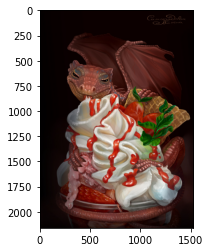

In [63]:
# show the image
import matplotlib.image as mpimg

test_img = mpimg.imread(elenasteem_test_img_path)
plt.imshow(test_img)


In [64]:
test_img = tf.keras.utils.load_img(elenasteem_test_img_path, target_size = (img_height, img_width))

img_array = tf.keras.utils.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0) # create the batch

predictions = model_1.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
"This image most likely belongs to {} with a {:.2f} percent confidence .".format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to elenasteem with a 91.25 percent confidence .


## testing all images in elenasteem creator directory

In [65]:
%ls top5creators_images/test/elenasteem

QmNiihDBMMFPtaXtXWoUr5ZoumaabYM9RgdrzZ5tV4Focy.jpeg
QmRpK2qLVeqD8Sa2SarnNPbt8B8a8U2uMMQGiM5WJqC4kV.jpg
QmSsTwH1Qm6ro7SqhjTccf63qnzW4shY3vE32XBJXX1dhh.jpg
QmVXVJNUezPfRegm9iB3XdQRm9GjiwdvuJpWEDs4yWGKTP.jpeg
QmVxavv9A8YPTNyssd1QtphhrARgy1D99RrXa85Zqjnwwu.jpeg
QmXAMyNoNJSU9dX2Uq2wkMQbWTKiSRkxMZBmt7mBGBVEQY.jpg
QmbCc4hwzUJ49ok2S8h4Q5VZADSnTgwFVc7LC9zT5rw6f4.jpg
Qmc7XpKwtDamjrW4QKN7fQKSduxs3vHiaYNUv9khft8qvu.jpg


In [66]:
test_imgs = tf.keras.utils.image_dataset_from_directory(
  'top5creators_images/test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 21 files belonging to 5 classes.


Cleanup called...
Cleanup called...
Cleanup called...


labels =  tf.Tensor([4 2 2 3 4 0 2 4 0 0 1 0 0 2 1 4 2 2 2 2 4], shape=(21,), dtype=int32)
This image most likely belongs to elenasteem with a 97.63 percent confidence .


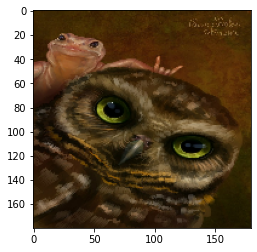

In [67]:
# number of images in test folder 
i = 1

for images, labels in test_imgs.take(1):
    
    if i <21:
        print("labels = ", labels)
        #plt.imshow(mpimg.imread(images[i]))
        plt.imshow(images[i].numpy().astype("uint8"))
        img_array = tf.keras.utils.img_to_array(images[i])
        img_array = tf.expand_dims(img_array, 0) # create the batch

        predictions = model_1.predict(img_array)
        score = tf.nn.softmax(predictions[0])


        print(
        "This image most likely belongs to {} with a {:.2f} percent confidence .".format(class_names[np.argmax(score)], 100 * np.max(score)))
    i+=1

## to make sure that this images is belongs to the same creator in the prediction 
## i will print all images in test directory and thier labels

Cleanup called...
Cleanup called...


<class 'tensorflow.python.framework.ops.EagerTensor'>


Cleanup called...


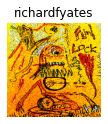

In [68]:
plt.figure(figsize=(10, 10))
for images, labels in test_imgs.take(1):
    print(type(images))
    
    # we specify 21 according to number of images in the test directory to show all images 
    # and compare them with the predicted image
    for i in range(5):
        if i >= 4:
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Overfitting 

#### We can see the availabel images in test directory it's varies every time we run this notebook

#### as the distribution of images in every time is randomlly dirstibuted from top5creators directory

#### to top5creators_images directory but we can make sure that this image belongs to the creator 

#### by exploring out csv file and select it's cid 

#### and we can copy the cid from test directory after we make usre that is belongs to

#### the same creator , and then assign this path to the following varibale img_path

# Data Augmentaion

In [69]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",
                     input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

## Visualize some random images after augmentated them

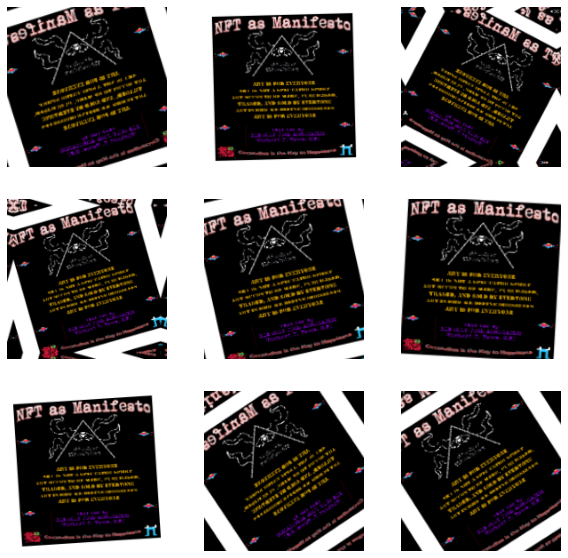

In [70]:
plt.figure(figsize=(10,10))

for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# Dropout

> When Using dropout to a lyer , it randomly dropouts a number of output units from the layer during the training process 

> Dropout takes a fractional number as it's input value , in the form such as 0.2 , 0.4 , and so on 

> this means dropping out by 20% or 40% of the output unit randomly from the applied layer

In [71]:
model_2 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    #layers.normoalize 
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

## Compile and train the model_2

In [72]:
model_2.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [73]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [74]:
epochs = 100

history = model_2.fit(
train_ds,
validation_data = val_ds,
epochs = epochs)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 1.9064 - accuracy: 0.3097 - val_loss: 1.3965 - val_accuracy: 0.3167
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 1.3616 - accuracy: 0.4258 - val_loss: 1.4683 - val_accuracy: 0.3667
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 1.2839 - accuracy: 0.5161 - val_loss: 1.3036 - val_accuracy: 0.5167
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 1.1942 - accuracy: 0.6000 - val_loss: 1.2122 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 1.0812 - accuracy: 0.6000 - val_loss: 1.3212 - val_accuracy: 0.5833
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.9833 - accuracy: 0.6387 - val_loss: 1.5810 - val_accuracy: 0.5500
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.8532 - accuracy: 0.7000 - val_loss: 1.7593 - val_accuracy: 0.4667
Epoch 

## Visualize training results 

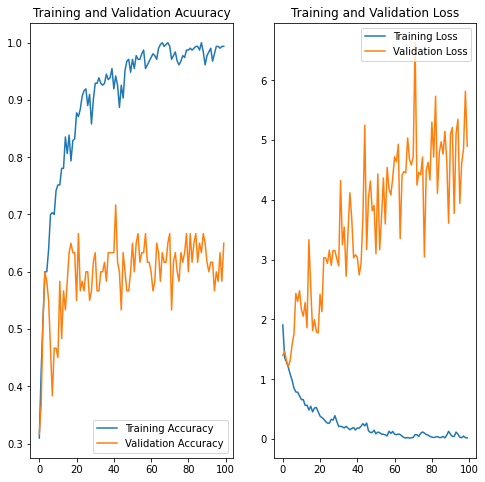

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize =  (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Acuuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing The Model and Prediction

### We will take a test image and try to predict it

## for example we will take an iamge from artxmike creator and see if the model can predict this creator or not ! :)

In [76]:
%ls top5creators_images/test/artxmike 

QmNv4QfG3hYpCCCvA4QH8A2Z46i4m3cdjR1MXfJaej48iv.jpg
QmXH5Zkk1JzUTZnj7hVG9mUWHvduR4CCRrPB3Q2jJ5Npc2.jpg
QmYs51SU6Ec4yWkpuDDQwXV59AZRT9N23dePLj55mDP6nc.jpeg
QmZeefznNR6DfZgganK8GT3K3gy9k92ebCd5q6oBpUh1DB.jpg
QmaYKySoYZxiR6XBiLbKVHkYpWrxUG7waZermBsGLYE7j9.jpg


In [77]:
PHOTO_DATA[PHOTO_DATA['creator'] == 'artxmike']['cid']

247     Qmbhg4Vxzk4MwbYq3oNeTzevhtqWRjkTQf98HdmG4CG6f2
341     QmYfV19eskXdaWgxjuLfBVmZwDoB7hqzEXR1zZKAuqaeRH
354     QmeDGR1MJWdCSBXiqLgAYvNn4NbV7QhQgB3pkpGd6b9wHY
401     QmQunCNL9bVZkgi6LHySzJRTps6PXpuhBfrB8BpZLA5xFN
613     QmWcTUdqJkoxe1LSXSWSkkm66pZ8G1uZALtQExeZTgu4zH
                             ...                      
4044    QmQYVhQq4w5xRLLL6p8YbQDsxw3bnpz45hUUXYhRBjP3H4
4096    QmQ9BRvwJyysQDuEqsGNEfcA7na93vYQakzXNimjpSmv29
4117    QmUEY6gNjQ3ufuVXW5kUR83DQW9y1EQ3a1UMfkgZ2cNNff
4119    QmQYVhQq4w5xRLLL6p8YbQDsxw3bnpz45hUUXYhRBjP3H4
4145    QmQ9BRvwJyysQDuEqsGNEfcA7na93vYQakzXNimjpSmv29
Name: cid, Length: 99, dtype: object

In [78]:
#img_path = 'top5creators_images/test/artxmike/QmUEY6gNjQ3ufuVXW5kUR83DQW9y1EQ3a1UMfkgZ2cNNff.jpg'

artxmike_test_img_path = '/kaggle/working/top5creators_images/test/artxmike/'+ os.listdir('/kaggle/working/top5creators_images/test/artxmike')[0]

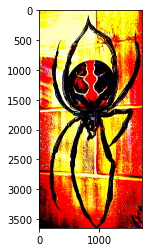

In [79]:
# show the image
import matplotlib.image as mpimg

test_img = mpimg.imread(artxmike_test_img_path)
plt.imshow(test_img)


In [80]:
test_img = tf.keras.utils.load_img(artxmike_test_img_path, target_size = (img_height, img_width))
img_array = tf.keras.utils.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0) # create the batch

predictions = model_2.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
"This image most likely belongs to {} with a {:.2f} percent confidence ."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to artxmike with a 100.00 percent confidence .


## I will use another approach based on files locations 
## so i will use only the top5creators directory to load images 
## and split them to train and val sets

### loading data

In [81]:
import pathlib
data_dir = pathlib.Path("top5creators")


### loading train, val and test datasets

In [82]:
image_count = len(list(data_dir.glob('*/*.*')))

list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)


val_size = int(image_count * 0.2)
test_size = int(image_count * 0.1)

train_ds = list_ds.skip(val_size)
test_ds = list_ds.take(test_size)
val_ds = list_ds.take(val_size)


In [83]:
image_count

391

In [84]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())
print(tf.data.experimental.cardinality(test_ds).numpy())


313
78
39


In [85]:
print(list(range(10,20)))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [86]:
for f in train_ds.take(15):
    print(f.numpy())

b'top5creators/elenasteem/Qme1yGNan8soo5ENm9Qos7DH1poA84rFLDJUvZapPzRLnv.jpg'
b'top5creators/artxmike/QmQZafVbLW1uPxuVUh9gJiSUYM3gnUo53VenSBk8i91bZr.jpg'
b'top5creators/doze/QmWSjyDTbfYvfVv3t56KtVEDDG2TM5dsUb5p8EXCTR8pmx.jpeg'
b'top5creators/richardfyates/QmUdYsxzxCDRkAtwTUrf1BWJFRpFZgfp2jtgwEYqRhnNdw.png'
b'top5creators/doze/QmTd2EWs24mugFxueABGo8WFQr2iCNnU1fnM8EbsJe2Bqh.jpeg'
b'top5creators/doze/Qmexy1NQbLPf183Hf6LwPmYSgv9MCtzBggVxeXY11rtNpg.png'
b'top5creators/doze/QmeejKasZ8woKzDv3HmgUq8BDxbSsPWobmZtVEdAm1zyjX.png'
b'top5creators/richardfyates/QmcMehLEsZNcEbAkuDKC6JxdaWZXZ4q3Pqtd8UrYLc4p3U.png'
b'top5creators/elenasteem/QmW3JnJuuaYFT2h5w7sqUFht75hKngLLNAW5SzwkyRYE4a.jpg'
b'top5creators/doze/QmddGbq9X9H5Kc3KFMCpM3eGEpSmhdyakGMjtMu3aNRMxj.png'
b'top5creators/artxmike/QmRkBEeTcD1mfiLcHSbksZJn6DHWvit2Rt4FEUAAuU3PYB.jpg'
b'top5creators/doze/QmTcdkuDW4FnaunyfXewsWxLQcYBAyvJMswtC47RKfxR63.png'
b'top5creators/richardfyates/QmP6WpmFyUvW6CBBW62zpqo7xPpbSnbMxYXPvvGHCXXM7X.png'
b'top5creators/

In [87]:
def get_label(file_path):
  # Convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    print("parts = ", parts)
  # The second to last is the class-directory
    one_hot = parts[-2] == class_names
    print("parts[-2] = ", parts[-2])
    print("file_path = ", file_path)
    print("one hot = ",one_hot)
    print("class names = ", class_names)
    
  # Integer encode the label
    return tf.argmax(one_hot)

In [88]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_image(img, channels=3,expand_animations = False )
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [89]:
def process_path(file_path):
    label = get_label(file_path)
    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [90]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(process_path, num_parallel_calls = AUTOTUNE)

parts =  Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
parts[-2] =  Tensor("strided_slice_1:0", shape=(), dtype=string)
file_path =  Tensor("args_0:0", shape=(), dtype=string)
one hot =  Tensor("Equal:0", shape=(5,), dtype=bool)
class names =  ['artxmike', 'doze', 'elenasteem', 'elgeko', 'richardfyates']
parts =  Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
parts[-2] =  Tensor("strided_slice_1:0", shape=(), dtype=string)
file_path =  Tensor("args_0:0", shape=(), dtype=string)
one hot =  Tensor("Equal:0", shape=(5,), dtype=bool)
class names =  ['artxmike', 'doze', 'elenasteem', 'elgeko', 'richardfyates']
parts =  Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)
parts[-2] =  Tensor("strided_slice_1:0", shape=(), dtype=string)
file_path =  Tensor("args_0:0", shape=(), dtype=string)
one hot =  Tensor("Equal:0", shape=(5,), dtype=bool)
class names =  ['artxmike', 'doze', 'elenasteem'

In [91]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())
print(tf.data.experimental.cardinality(test_ds).numpy())


313
78
39


In [92]:
for image, label in train_ds.take(1):
      print("Image shape: ", image.numpy().shape)
      print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  2


In [93]:
for image, label in val_ds.take(1):
      print("Image shape: ", image.numpy().shape)
      print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  0


Cleanup called...


In [94]:
for image, label in test_ds.take(3):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())
    #plt.imshow(image[0].numpy().astype("uint8"))  

Image shape:  (180, 180, 3)
Label:  0
Image shape:  (180, 180, 3)
Label:  2
Image shape:  (180, 180, 3)
Label:  3


Cleanup called...


In [95]:
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    #ds = ds.batch(batch_size)
    ds = ds.batch(5)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)

In [96]:
#image_batch, label_batch = next(iter(test_ds))


'''
plt.figure(figsize=(10, 10))
for i in range(tf.data.experimental.cardinality(test_ds).numpy()):
    image, label in val_ds.take(i)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    label = label[i]
    plt.title(class_names[label])
    plt.axis("off")'''

'\nplt.figure(figsize=(10, 10))\nfor i in range(tf.data.experimental.cardinality(test_ds).numpy()):\n    image, label in val_ds.take(i)\n    ax = plt.subplot(3, 3, i + 1)\n    plt.imshow(image[i].numpy().astype("uint8"))\n    label = label[i]\n    plt.title(class_names[label])\n    plt.axis("off")'

### build the model

In [97]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

num_classes = len(class_names)

# build the model with Dropout and regulariztion



model_3 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(180, 3, padding='same', activation = 'relu'),
    #layers.MaxPooling2D(),
    #layers.Conv2D(180, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(360, activation = 'relu'),
    #layers.Dense(num_classes)
    layers.Dense(num_classes,
                     #kernel_initializer='ones',
                     kernel_regularizer=regularizers.L1(0.01),
                     activity_regularizer=regularizers.L2(0.01))
    
])


'''
model = Sequential([
    layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same' , activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    #layers.Dense(num_classes)
    layers.Dense(num_classes,
                     kernel_initializer='ones',
                     kernel_regularizer=regularizers.L1(0.01),
                     activity_regularizer=regularizers.L2(0.01))
    
])'''

"\nmodel = Sequential([\n    layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),\n    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Conv2D(32, 3, padding = 'same' , activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),\n    layers.MaxPooling2D(),\n    layers.Dropout(0.4),\n    layers.Flatten(),\n    layers.Dense(128, activation = 'relu'),\n    #layers.Dense(num_classes)\n    layers.Dense(num_classes,\n                     kernel_initializer='ones',\n                     kernel_regularizer=regularizers.L1(0.01),\n                     activity_regularizer=regularizers.L2(0.01))\n    \n])"

In [98]:
model_3.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [99]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 180)       52020     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 180)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 180)      

In [100]:
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:23:16.785399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:23:21.184429: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 68 of 1000
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-10-24 02:23

63/63 [==============================] - ETA: 0s - loss: 5.6268 - accuracy: 0.4281

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


63/63 [==============================] - 44s 188ms/step - loss: 5.6268 - accuracy: 0.4281 - val_loss: 2.2248 - val_accuracy: 0.4615
Epoch 2/50
63/63 [==============================] - 2s 29ms/step - loss: 1.8571 - accuracy: 0.5847 - val_loss: 1.6379 - val_accuracy: 0.6154
Epoch 3/50
63/63 [==============================] - 2s 29ms/step - loss: 1.6653 - accuracy: 0.6262 - val_loss: 1.6283 - val_accuracy: 0.6282
Epoch 4/50
63/63 [==============================] - 2s 29ms/step - loss: 1.5640 - accuracy: 0.6965 - val_loss: 1.5912 - val_accuracy: 0.6667
Epoch 5/50
63/63 [==============================] - 2s 29ms/step - loss: 1.5427 - accuracy: 0.6518 - val_loss: 2.1619 - val_accuracy: 0.5385
Epoch 6/50
63/63 [==============================] - 2s 30ms/step - loss: 1.4395 - accuracy: 0.7093 - val_loss: 2.3034 - val_accuracy: 0.5256
Epoch 7/50
63/63 [==============================] - 2s 29ms/step - loss: 1.3828 - accuracy: 0.7220 - val_loss: 1.9427 - val_accuracy: 0.5897
Epoch 8/50
63/63 [====

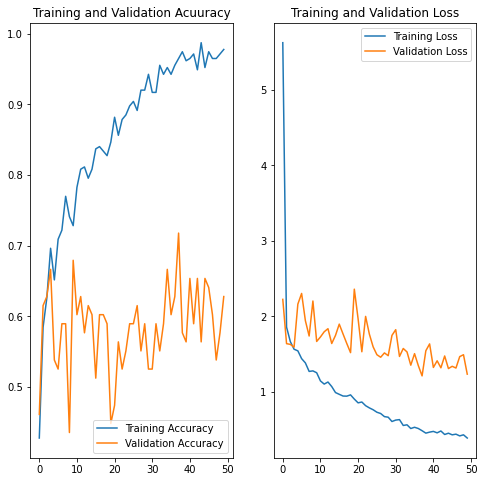

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize =  (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Acuuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

### thest the following image 
### this image belongs to the creator elgeko 

In [102]:
%ls top5creators_images/test/elgeko/

QmZdTebqzBkQjzP1jNVJRky3p7ZovwnuYErJF8Uv21nQfW.png


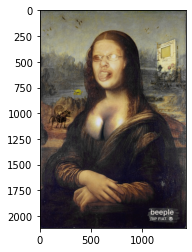

In [103]:
#img_path = 'top5creators_images/test/elgeko/QmYkG6A5UFoGckTvLusrToMTxsGApTysfx4mfNN8pYG4So.jpg'
elgeko_test_img_path = '/kaggle/working/top5creators_images/test/doze/'+ os.listdir('/kaggle/working/top5creators_images/test/doze')[0]




# show the image
import matplotlib.image as mpimg

test_img = mpimg.imread(elgeko_test_img_path)
plt.imshow(test_img)




In [104]:


test_img = tf.keras.utils.load_img(elgeko_test_img_path, target_size = (img_height, img_width))
img_array = tf.keras.utils.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0) # create the batch

predictions = model_3.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
"This image most likely belongs to {} with a {:.2f} percent confidence ."
.format(class_names[np.argmax(score)], 100 * np.max(score))) 

This image most likely belongs to elenasteem with a 78.16 percent confidence .


### it predict succefully the image

In [105]:
!mkdir -p saved_model
model_1.save('saved_model/my_model_1')
model_2.save('saved_model/my_model_2')
model_3.save('saved_model/my_model_3')


2022-10-24 02:26:23.139516: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-10-24 02:26:28.880997: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 524880000 exceeds 10% of free system memory.


In [106]:
#%ls saved_model/my_model/

In [107]:
import shutil
shutil.make_archive('my_models', 'zip', 'saved_model/')

'/kaggle/working/my_models.zip'

In [108]:
BATCH_SIZE = 32
IMG_SIZE = (180, 180)


In [109]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [110]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [111]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [112]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [113]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(5, 6, 6, 1280)


In [114]:
base_model.trainable = False

In [115]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(5, 1280)


In [116]:
prediction_layer = tf.keras.layers.Dense(5)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(5, 5)


In [188]:
inputs = tf.keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

In [160]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [161]:
len(model.trainable_variables)

56

In [162]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

16/16 [==============================] - 1s 9ms/step - loss: 0.9214 - accuracy: 0.7179


In [163]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.92
initial accuracy: 0.72


In [164]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
63/63 [==============================] - 4s 15ms/step - loss: 0.6731 - accuracy: 0.7732 - val_loss: 1.1979 - val_accuracy: 0.7051
Epoch 2/10
63/63 [==============================] - 1s 18ms/step - loss: 0.4467 - accuracy: 0.8498 - val_loss: 1.0463 - val_accuracy: 0.6923
Epoch 3/10
63/63 [==============================] - 1s 16ms/step - loss: 0.3052 - accuracy: 0.8818 - val_loss: 1.0763 - val_accuracy: 0.7051
Epoch 4/10
63/63 [==============================] - 1s 15ms/step - loss: 0.3373 - accuracy: 0.8754 - val_loss: 0.7761 - val_accuracy: 0.7051
Epoch 5/10
63/63 [==============================] - 1s 15ms/step - loss: 0.2955 - accuracy: 0.8914 - val_loss: 0.9394 - val_accuracy: 0.7692
Epoch 6/10
63/63 [==============================] - 1s 15ms/step - loss: 0.2210 - accuracy: 0.9265 - val_loss: 0.8478 - val_accuracy: 0.7821
Epoch 7/10
63/63 [==============================] - 1s 15ms/step - loss: 0.2743 - accuracy: 0.9042 - val_loss: 0.8616 - val_accuracy: 0.7949
Epoch 8/10
63

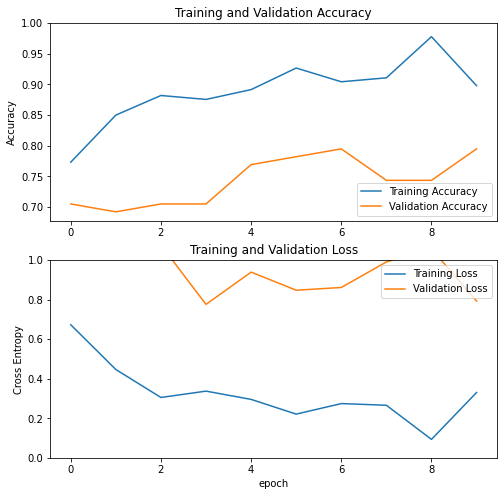

In [166]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

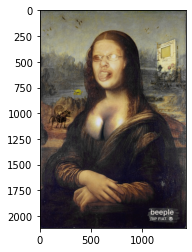

In [167]:
#img_path = 'top5creators_images/test/elgeko/QmYkG6A5UFoGckTvLusrToMTxsGApTysfx4mfNN8pYG4So.jpg'
elgeko_test_img_path = '/kaggle/working/top5creators_images/test/doze/'+ os.listdir('/kaggle/working/top5creators_images/test/doze')[0]




# show the image
import matplotlib.image as mpimg

test_img = mpimg.imread(elgeko_test_img_path)
plt.imshow(test_img)





In [168]:


test_img = tf.keras.utils.load_img(elgeko_test_img_path, target_size = (img_height, img_width))
img_array = tf.keras.utils.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0) # create the batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
"This image most likely belongs to {} with a {:.2f} percent confidence ."
.format(class_names[np.argmax(score)], 100 * np.max(score))) 

This image most likely belongs to elenasteem with a 99.33 percent confidence .


In [169]:
base_model.trainable = True

In [170]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [171]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [172]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential_4 (Sequential)    (None, None, None, 3)     0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 180, 180, 3)       0         
_________________________________________________________________
tf.math.subtract_2 (TFOpLamb (None, 180, 180, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0   

In [173]:
len(model.trainable_variables)

56

In [174]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 10/20
63/63 [==============================] - 6s 29ms/step - loss: 0.0447 - accuracy: 0.9872 - val_loss: 0.8931 - val_accuracy: 0.8077
Epoch 11/20
63/63 [==============================] - 1s 18ms/step - loss: 0.0359 - accuracy: 0.9936 - val_loss: 0.9011 - val_accuracy: 0.8077
Epoch 12/20
63/63 [==============================] - 1s 17ms/step - loss: 0.0223 - accuracy: 0.9904 - val_loss: 0.9516 - val_accuracy: 0.8077
Epoch 13/20
63/63 [==============================] - 1s 17ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.0427 - val_accuracy: 0.8333
Epoch 14/20
63/63 [==============================] - 1s 23ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.1530 - val_accuracy: 0.7949
Epoch 15/20
63/63 [==============================] - 1s 24ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.2038 - val_accuracy: 0.8205
Epoch 16/20
63/63 [==============================] - 1s 17ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.1226 - val_accuracy: 0.8333
Epoch 

In [175]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

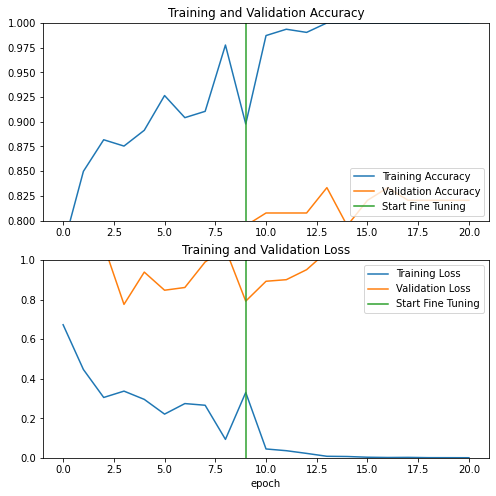

In [176]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [177]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

8/8 [==============================] - 0s 8ms/step - loss: 1.5990 - accuracy: 0.7692
Test accuracy : 0.7692307829856873


Predictions:
 [0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0]
Labels:
 [2 4 4 0 2]


IndexError: index 5 is out of bounds for axis 0 with size 5

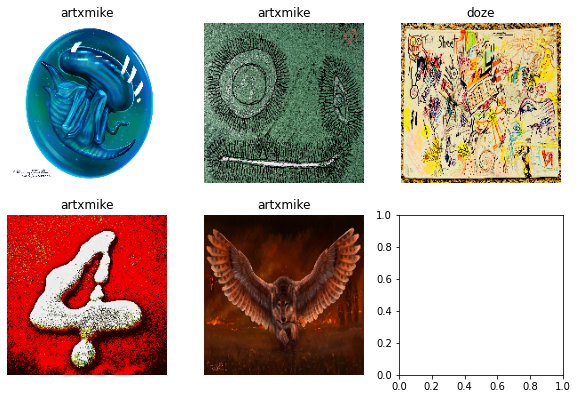

In [178]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

This image most likely belongs to elenasteem with a 100.00 percent confidence .


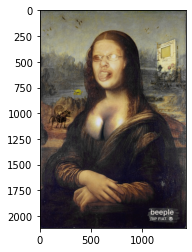

In [179]:
#img_path = 'top5creators_images/test/elgeko/QmYkG6A5UFoGckTvLusrToMTxsGApTysfx4mfNN8pYG4So.jpg'
doze_test_img_path = '/kaggle/working/top5creators_images/test/doze/'+ os.listdir('/kaggle/working/top5creators_images/test/doze')[0]




# show the image
import matplotlib.image as mpimg

test_img = mpimg.imread(doze_test_img_path)
plt.imshow(test_img)





test_img = tf.keras.utils.load_img(doze_test_img_path, target_size = (img_height, img_width))
img_array = tf.keras.utils.img_to_array(test_img)
img_array = tf.expand_dims(img_array, 0) # create the batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


print(
"This image most likely belongs to {} with a {:.2f} percent confidence ."
.format(class_names[np.argmax(score)], 100 * np.max(score))) 

In [180]:
model.save('saved_model/model_img_net')
import shutil
shutil.make_archive('model_img_net', 'zip', 'saved_model/model_img_net')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


'/kaggle/working/model_img_net.zip'

In [153]:
!pip install git+https://github.com/paulgavrikov/visualkeras --upgrade


  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-yisr2a6n
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-yisr2a6n
  Resolved https://github.com/paulgavrikov/visualkeras to commit d7111d3471173c0b16853a6ce5e4cc645498380a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 3.8 MB/s eta 0:00:00a 0:00:01
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13449 sha256=a5be3c7cc462f6b6de7e3131a97bab095bef3f38fd9ded571c504ecc7c32d1ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-_pe5tvqq/wheels/b8/3b/cf/30a062e766188d5fe50abf3d461720943b7d09906e3d261a94
Successfully built visualkeras


In [155]:
import visualkeras

In [183]:
visualkeras.layered_view(model, legend=True, draw_volume=False)


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'